In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive/TSAI_END2/Session7/Assignment1'

/content/gdrive/MyDrive/TSAI_END2/Session7/Assignment1


In [3]:
from nlp_classification_api import *

In [4]:
%cd '../../../../../'

/content


In [5]:
import torch
import spacy
import numpy as np

import random
import math
import time

In [6]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
# !pip install spacy --upgrade

In [7]:
model_params = {'embedding_dim': 100, 'hidden_dim1': 256, 'hidden_dim2': 128, 'n_layers': 2, 'bidirectional': True, 'dropout': 0.2}
params = {'data_path': 'gdrive/MyDrive/TSAI_END2/Session5/stanfordSentimentTreebank', 'data_name': 'sst', 'model_name': 'basic classification model', 'model_params': model_params, 'seed': SEED, 'batch_size': 128, 'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')}

nlp_pipeline = NLPClassificationPipeline(**params)

Loading data...


.vector_cache/glove.6B.zip: 0.00B [00:00, ?B/s]

Number of training examples: 7900
Number of testing examples: 3386


.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                          
 99%|█████████▉| 397360/400000 [00:14<00:00, 27112.99it/s]

Unique tokens in source vocabulary: 16388
Unique tokens in target vocabulary: 5
Data is loaded


Loading model...
Model Loaded...
Model Structure:- 
NLPBasicClassifier(
  (embedding): Embedding(16388, 100, padding_idx=1)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (act): Softmax(dim=None)
)
The model has 4,015,253 trainable parameters
Model Built


In [8]:
EPOCHS = 10

train_losses, train_accs, valid_losses, valid_accs = nlp_pipeline.train_model(EPOCHS, 'gdrive/MyDrive/TSAI_END2/Session7/Assignment1','sst_model')

Epoch: 01 | Epoch Time: 0m 1s
	Train Loss: 1.533 | Train Acc: 29.72%
	 Val. Loss: 1.472 |  Val. Acc: 34.75% 



 99%|█████████▉| 397360/400000 [00:29<00:00, 27112.99it/s]

Epoch: 02 | Epoch Time: 0m 1s
	Train Loss: 1.377 | Train Acc: 38.91%
	 Val. Loss: 1.344 |  Val. Acc: 41.22% 

Epoch: 03 | Epoch Time: 0m 1s
	Train Loss: 1.237 | Train Acc: 44.73%
	 Val. Loss: 1.327 |  Val. Acc: 42.01% 

Epoch: 04 | Epoch Time: 0m 1s
	Train Loss: 1.142 | Train Acc: 48.97%
	 Val. Loss: 1.379 |  Val. Acc: 40.51% 

Epoch: 05 | Epoch Time: 0m 1s
	Train Loss: 0.997 | Train Acc: 56.26%
	 Val. Loss: 1.435 |  Val. Acc: 43.44% 

Epoch: 06 | Epoch Time: 0m 1s
	Train Loss: 0.823 | Train Acc: 65.49%
	 Val. Loss: 1.598 |  Val. Acc: 40.62% 

Epoch: 07 | Epoch Time: 0m 1s
	Train Loss: 0.682 | Train Acc: 72.18%
	 Val. Loss: 1.883 |  Val. Acc: 39.53% 

Epoch: 08 | Epoch Time: 0m 1s
	Train Loss: 0.508 | Train Acc: 80.66%
	 Val. Loss: 2.120 |  Val. Acc: 40.53% 

Epoch: 09 | Epoch Time: 0m 1s
	Train Loss: 0.369 | Train Acc: 86.48%
	 Val. Loss: 2.592 |  Val. Acc: 37.79% 

Epoch: 10 | Epoch Time: 0m 1s
	Train Loss: 0.268 | Train Acc: 90.00%
	 Val. Loss: 3.311 |  Val. Acc: 38.86% 



In [17]:
plt.rcParams["figure.figsize"] = (10,10)

| Test Loss: 3.311 | Test Accuracy: 0.389 |
Evaluation Metrics on Test Data:-
F1 Macro Score: 0.38181634331169134
Accuracy: 38.98405197873597 %


Confusion Matrix:-


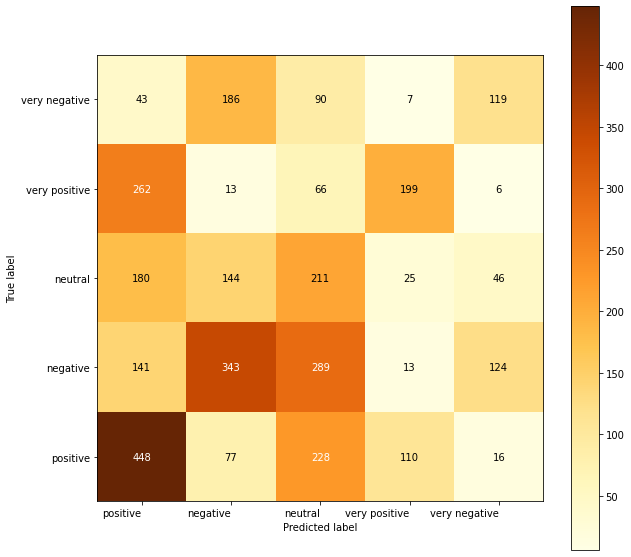

In [18]:
nlp_pipeline.evaluate_model()

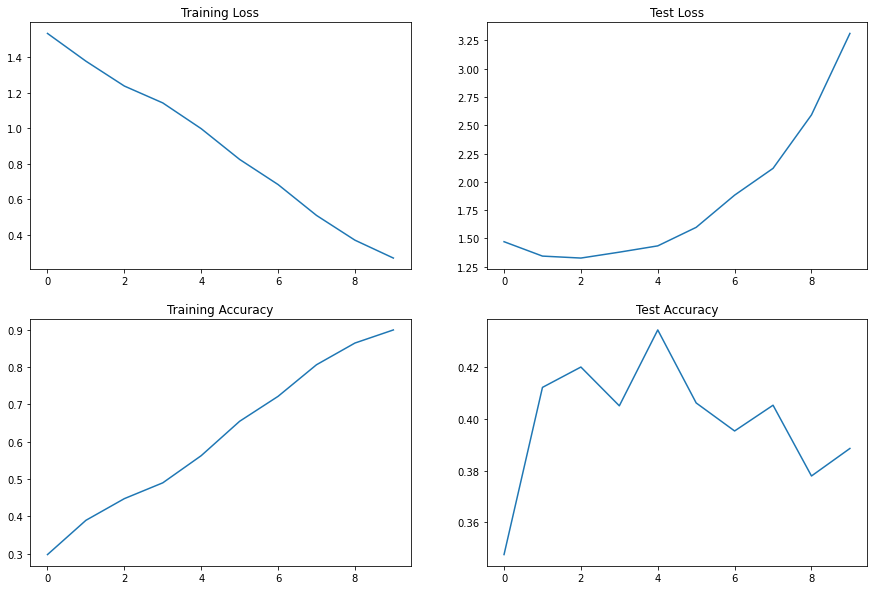

In [10]:
nlp_classification_pipeline.visualize_graph(train_losses, train_accs, valid_losses, valid_accs)

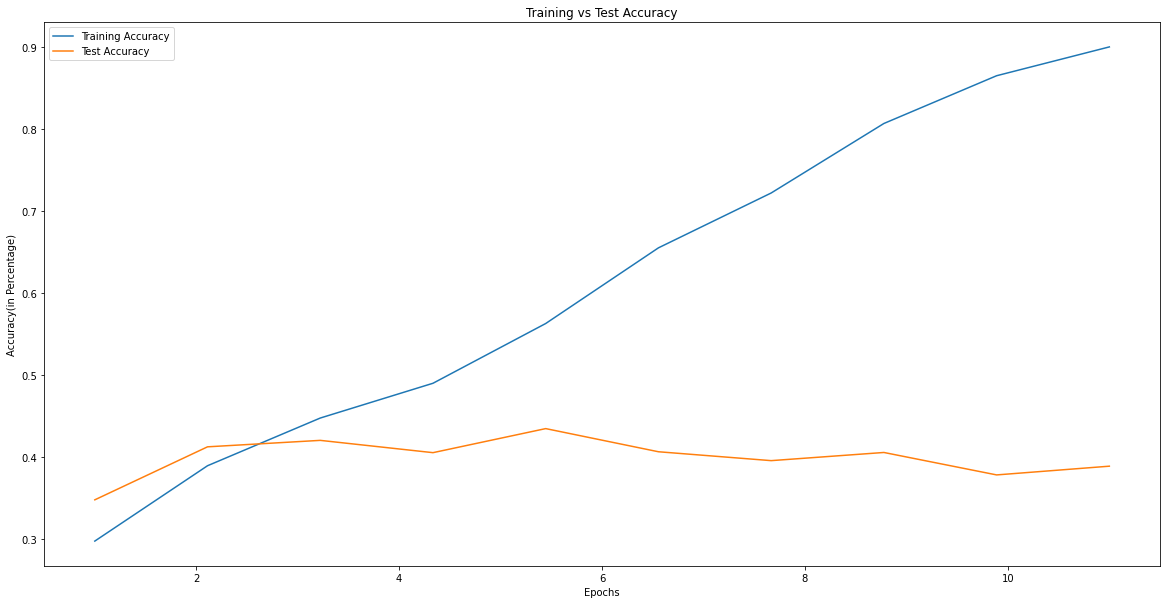

In [11]:
dict_list = {'Training Accuracy': train_accs, 'Test Accuracy': valid_accs}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_comparison_graph"
EPOCHS = 10

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

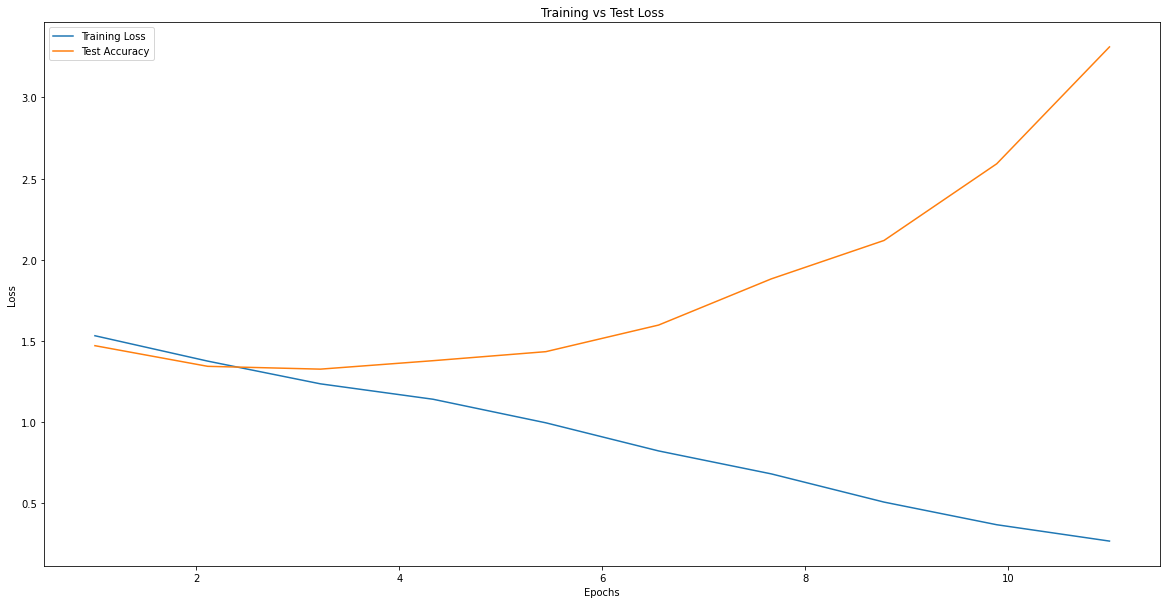

In [12]:
dict_list = {'Training Loss': train_losses, 'Test Accuracy': valid_losses}
title = "Training vs Test Loss"
xlabel = "Epochs"
ylabel = "Loss"
name = "train_vs_test_loss_comparison_graph"

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

In [13]:
nlp_pipeline.get_classified_test_data()

****************************************
***** Correctly Classified Text: *******
****************************************
1) Text: A perfectly pleasant if slightly  comedy .
   Target Sentiment: positive
   Predicted Sentiment: positive

2) Text: Unfolds as one of the most politically audacious films of recent decades from any country , but especially from France .
   Target Sentiment: positive
   Predicted Sentiment: positive

3) Text: There 's a sheer unbridled delight in the way the story  ... 
   Target Sentiment: positive
   Predicted Sentiment: positive

4) Text: The Four Feathers is definitely   , but if you go in knowing that , you might have fun in this cinematic  . 
   Target Sentiment: positive
   Predicted Sentiment: positive

5) Text: ... the story , like  's Bolero , builds to a  that encompasses many more paths than we started with .
   Target Sentiment: positive
   Predicted Sentiment: positive

6) Text: A comedy that is warm , inviting , and surprising . 
   Target Se

In [14]:
nlp_pipeline.get_classified_test_data(correct=False)

****************************************
***** Incorrectly Classified Text: *******
****************************************
1) Text: The movie is n't just hilarious : It 's witty and inventive , too , and in hindsight , it is n't even all that dumb .
   Target Sentiment: very positive
   Predicted Sentiment: positive

2) Text: Stands as a document of what it felt like to be a New Yorker -- or , really , to be a human being -- in the weeks after 9\/11 .  
   Target Sentiment: positive
   Predicted Sentiment: neutral

3) Text: It works its magic with such exuberance and passion that the film 's length becomes a part of its fun .
   Target Sentiment: very positive
   Predicted Sentiment: positive

4) Text: It does n't do the original any particular  , but neither does it exude any charm or personality .
   Target Sentiment: negative
   Predicted Sentiment: neutral

5) Text: Do n't expect any surprises in this checklist of  cliches ... 
   Target Sentiment: very negative
   Predicted Sent